In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(parallel)
library(ggplot2)
is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  if(luminance < 128){
  return('white')
  }else{return('black')}
}

In [2]:
color_annotation <- read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

In [3]:
df<-read.csv("04_DEG_AgeGroup_CMVneg_vs_CMVpos/ZBTB38_Adaptive_NK_SF4.csv")

In [4]:
df$AIFI_L3<-"Adaptive NK cell"

`geom_smooth()` using formula = 'y ~ x'


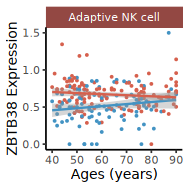

In [12]:
options(repr.plot.width = 40/25.4, repr.plot.height = 40/25.4)

p <- ggplot(df,
            aes(Ages, Mean_Expression,color=CMV)) +
    geom_point(size = 0.8,  stroke = 0) +

    geom_smooth(se=TRUE, method='lm', linewidth=0.5)+ylab("ZBTB38 Expression")+ xlab("Ages (years)")+ 
scale_color_manual(values = c("Positive"='#d6604d',  "Negative"='#4393c3'))+
    theme_bw(base_size = 8) +
    theme(axis.line = element_line(colour = "black"),
          legend.position = "top",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0),
          axis.title.x = element_text(margin = margin(t = 2))) +
    facet_wrap(~AIFI_L3,  scale='free_y')  + theme(
    panel.spacing = unit(-0.4,'lines')
  )+theme(legend.position="none")
g1 <- ggplot_gtable(ggplot_build(p))

strips <- which(grepl('strip-', g1$layout$name))

pal <- color_vector['Adaptive NK cell']
text_color <- sapply(color_vector['Adaptive NK cell'], is_dark_color)

for (i in seq_along(strips)) {
  k <- which(grepl('rect', g1$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  l <- which(grepl('titleGrob', g1$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  g1$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$fill <-  adjustcolor(pal[i], alpha.f = 0.8)
  g1$grobs[[strips[i]]]$grobs[[1]]$children[[l]]$children[[1]]$gp$col <- text_color[i]
}

plot(g1)
ggsave('FigureH.pdf',g1,width = 40/25.4,height = 40/25.4)